TIP 33 - SPLIT PERSONALITY
------------------


Matplotlib offers two quite different interfaces to plotting: 

First, a friendly API designed to tempt users away from MATLAB

Secondly, a more “Pythonic” object-oriented API which is harder to get into but which offers complete control.

TIP 44 - MATLAB STYLE API
------------

The buttons at the bottom of the window allow you to manipulate the figure and then save it if you wish. Recall, ```%matplotlib inline``` makes the chart appear in the notebook, while ```%matplotlib qt``` puts it in a pop out window.

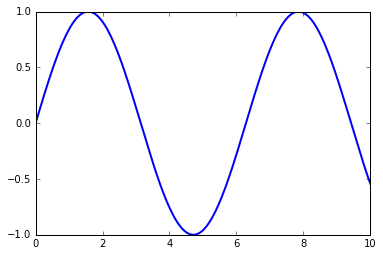

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 10, 200)
y = np.sin(x)
plt.plot(x, y, 'b-', linewidth=2)
plt.show()

TIP 45 - OBJECT-ORIENTED
----------

The API described above is simple and convenient, but also somewhat limited with lots of objects that get created and passed around without making themselves known to the coder.

Here’s the code corresponding to the preceding figure using the object oriented API:

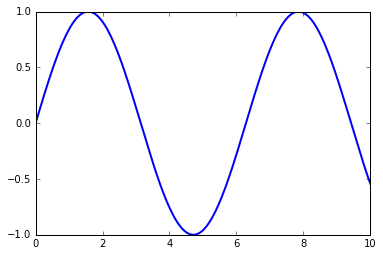

In [2]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
x = np.linspace(0, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'b-', linewidth=2)
plt.show()

There’s a bit more typing, but the more explicit use of objects gives us more fine-grained control.The call ```fig, ax = plt.subplots()``` returns a pair, where ```fig``` is a Figure instance—like a blank canvas, ```ax``` is an AxesSubplot instance — think of a frame for plotting in and the ```plot()``` function is actually a method of ```ax```

TIP 46 - LINE COLOUR
----------
we can make the line red and easily add a legend (We’ve also used ```alpha``` to make the line slightly transparent—which makes it look smoother):

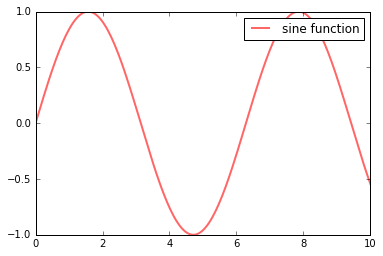

In [3]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
x = np.linspace(0, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend()
plt.show()

Unfortunately, the legend is obscuring the line. This can be fixed by replacing ```ax.legend()``` with ```ax.legend(loc='upper center')```:

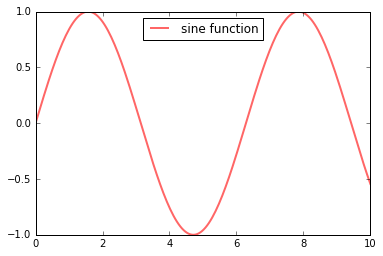

In [4]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
x = np.linspace(0, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='upper center')
plt.show()

Adding LaTeX to our plot is trivial:

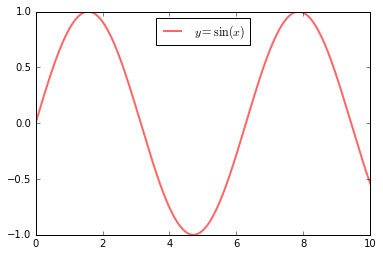

In [5]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
x = np.linspace(0, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label=r'$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
plt.show()

We also have complete control fo the ticks and titles:

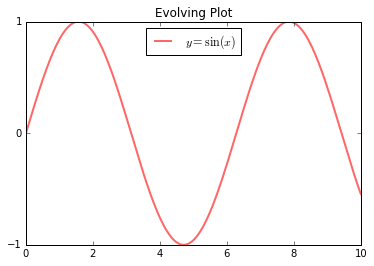

In [7]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
x = np.linspace(0, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label=r'$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
ax.set_yticks([-1, 0, 1])
ax.set_title('Evolving Plot')
plt.show()

TIP 47 - MULTIPLE PLOTS ON SAME AXES
--------------

Here’s an example that randomly generates three normal densities and adds a label with their mean:

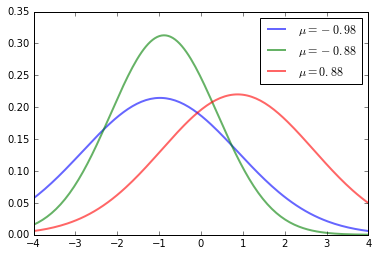

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from random import uniform

fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)
for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = r'$\mu = {0:.2f}$'.format(m) # Works to 2 decimal places
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)
ax.legend()
plt.show() 

TIP 48 - MULTIPLE SUBPLOTS
--------------

Here’s an example that generates 6 histograms within a single figure:

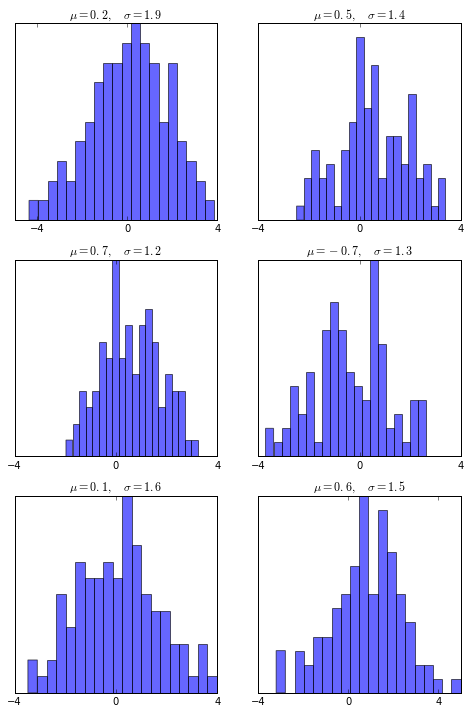

In [10]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from random import uniform
num_rows, num_cols = 3, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 12))
for i in range(num_rows):
    for j in range(num_cols):
        m, s = uniform(-1, 1), uniform(1, 2)
        x = norm.rvs(loc=m, scale=s, size=100)
        axes[i, j].hist(x, alpha=0.6, bins=20)
        t = r'$\mu = {0:.1f}, \quad \sigma = {1:.1f}$'.format(m, s)
        axes[i, j].set_title(t)
        axes[i, j].set_xticks([-4, 0, 4])
        axes[i, j].set_yticks([])
plt.show()

TIP 49 - 3D PLOTS
------------

Matplotlib does a nice job of 3D plots, here plotting $$z = \frac{cos(x^2 + y^2)}{1 + x^2 + y^2}$$

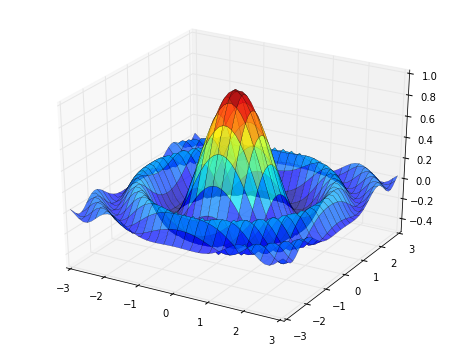

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
from matplotlib import cm

def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
                y,
                f(x, y),
                rstride=2, cstride=2,
                cmap=cm.jet,
                alpha=0.7,
                linewidth=0.25)
ax.set_zlim(-0.5, 1.0)
plt.show()